## EDA:
--------
The primary objective of the exploratory data analysis (EDA) was to gain insights into the data distribution and understand variable relationships. This was done through visualisations of box plots, bar graphs, and scatter plots, correlation matrix ect.

##### EDA overview:
- Bivariate, multivariate and Univariate analysis
- Correlations with target variable
- value counts 
- Distribution of target variable

## Imports:
-------

In [46]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import matplotlib as mlp

In [47]:
import joblib

df_eda=joblib.load('df_cleaning.pkl')


## Univariate analysis:
----


##### Plotting Numerical and Categorical Values:

In [48]:
categorical_columns = df_eda.select_dtypes(include=['object']) #A showing the dataframe columns with categorical values.
categorical_columns #printing the dataframe.

,video_id,trending_date,title,channel_title,publish_time,tags,thumbnail_link,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,2017-11-13T17:13:01.000Z,SHANtell martin,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",https://i.ytimg.com/vi/d380meD0W0M/default.jpg,I know it's been a while since we did this sho...
...,...,...,...,...,...,...,...,...
202305,fn5WNxy-Wcw,18.14.06,KINGDOM HEARTS III – E3 2018 Pirates of the Ca...,Kingdom Hearts,2018-06-12T01:54:02.000Z,"Kingdom Hearts|""KH3""|""Kingdom Hearts 3""|""Pirat...",https://i.ytimg.com/vi/fn5WNxy-Wcw/default.jpg,Find out more about Kingdom Hearts 3: https://...
202306,zAFv43lxqHE,18.14.06,YMS: The Visit,YourMovieSucksDOTorg,2018-06-13T21:58:43.000Z,[none],https://i.ytimg.com/vi/zAFv43lxqHE/default.jpg,Patreon: http://www.patreon.com/YMSTwitch: htt...
202307,zSXG5I6Y2fA,18.14.06,Ungut umgeschult – Grünwald als Ersthelfer am ...,Grünwald Freitagscomedy,2018-06-12T10:01:28.000Z,"Günter Grünwald|""Grünwald Freitagscomedy""|""Gün...",https://i.ytimg.com/vi/zSXG5I6Y2fA/default.jpg,Günter versucht sich als Ersthelfer bei einem ...
202308,5d115sePmaU,18.14.06,Assassin's Creed Odyssey: E3 2018 Welt-Enthüll...,Assassin's Creed DE,2018-06-11T21:16:55.000Z,"Assassin's Creed|""Assassins Creed""|""Assassin's...",https://i.ytimg.com/vi/5d115sePmaU/default.jpg,"Vom verstoßenen Söldner zum legendären Helden,..."


The object columns are majority text columns so they will be explored later on during the assingment with NLP. Columns with date data will be explored once they have been broken down into : Date, Year, Month to observe date/time patterns. Breaking down the date data is necessary for when the data is used during modelling.

## Distribution of Numerical columns:
----
 Assessing the Distribution of Numerical columns provides insights into the characteristics/ patterns of the data. This is helpful for understanding the structure for the data and making informed decisions on how to process the data. 

 - Detecting Outliers
 - Identifying skewness

##### Frequency of Comment Count:


Text(0.5, 1.0, 'Frequency Of comments')

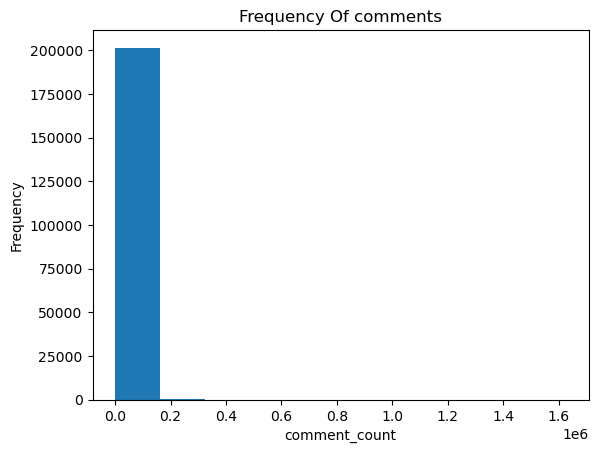

In [49]:
plt.figure() #plotting the bar chart
plt.hist(df_eda['comment_count']) #plotting a histogram
plt.ylabel('Frequency')
plt.xlabel('comment_count')
plt.title('Frequency Of comments')


The comment_count presents a right skewed distibution. There is a higher frequency of comments in the lower ranges of the comment counts. Log transformation will need to be applied to this column to normalize the data so that it is more symmetric.

##### Boxplot: Distribution of YouTube Video Comment_Count

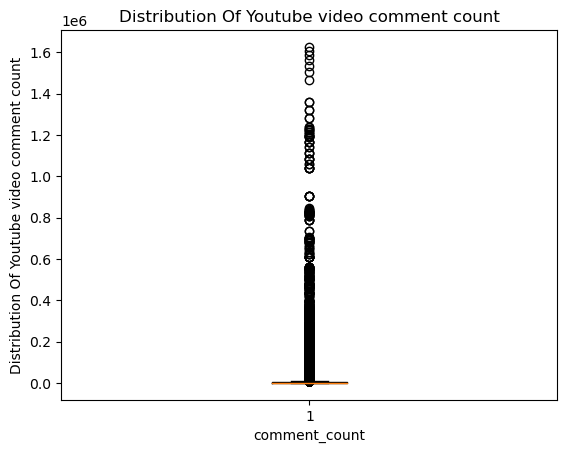

In [50]:
plt.figure() #setting the frame figure
plt.boxplot(df_eda['comment_count']) #plotting a boxplot
plt.ylabel('Distribution Of Youtube video comment count')
plt.xlabel('comment_count')
plt.title('Distribution Of Youtube video comment count')
plt.show() #showing the boxplot

##### Log transformation on comment count:

Larger values are compressed more than smaller values, bringing the distribution closer to a normal distribution. Log transformation changes the scale of the data and transforms every value to its logarithmic value.
np.log1p will be used instead of np.log. This because this dataset is full of 0s, the normal log function does not work on 0s because the logarithm of 0 is undefined. np.log1 adds a one to the 0s so that the log transformation can be done (a constant value)

Text(0.5, 1.0, 'Frequency Of comments')

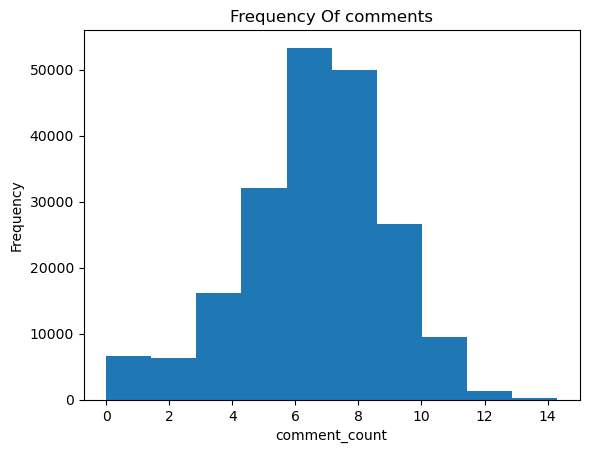

In [51]:
plt.figure()
plt.hist(np.log1p(df_eda['comment_count']))
plt.ylabel('Frequency')
plt.xlabel('comment_count')
plt.title('Frequency Of comments')

After applying log transformation to the comment_count column the histogram shows a more normal distribution. However, the frequency of comments on the right side of the histogram is slightly higher than they are on the left.

##### Frequency of Dislikes:

Dislikes: The number of people who reacted negatively to a specific Youtube video.

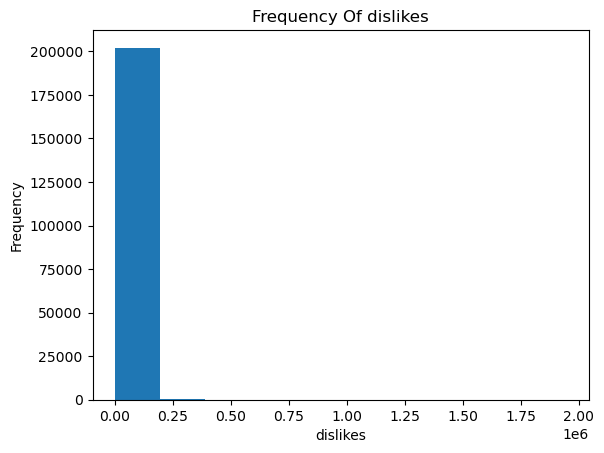

In [52]:
plt.figure()
plt.hist(df_eda['dislikes'])
plt.ylabel('Frequency')
plt.xlabel('dislikes')
plt.title('Frequency Of dislikes')
plt.show()

 The above histogram shows that the distribution of likes is right skewed. There is a higher frequency of values situated at the lower numbers of likes. The frequency of likes decreases as the number of likes increases. 


It is expected that the number of likes spikes towards the lowest values of the histogram because it is assumed that by default trending Youtube videos will have a large number of either likes or dislikes due to their popularity.


Log transformation will need to be applied to this column to normalize the data so that it is more symmetric.

##### Boxplot: Distribution of YouTube Video Dislikes

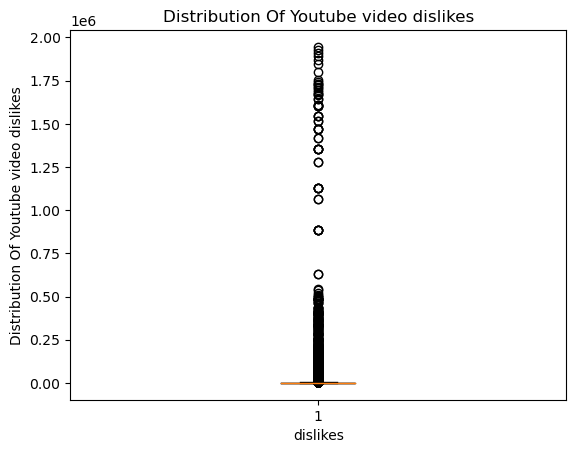

In [54]:
plt.figure()
plt.boxplot(df_eda['dislikes'])#plotting the boxplot
plt.ylabel('Distribution Of Youtube video dislikes')
plt.xlabel('dislikes')
plt.title('Distribution Of Youtube video dislikes')
plt.show()#showing the boxplot

##### Log transformation on Dislikes:


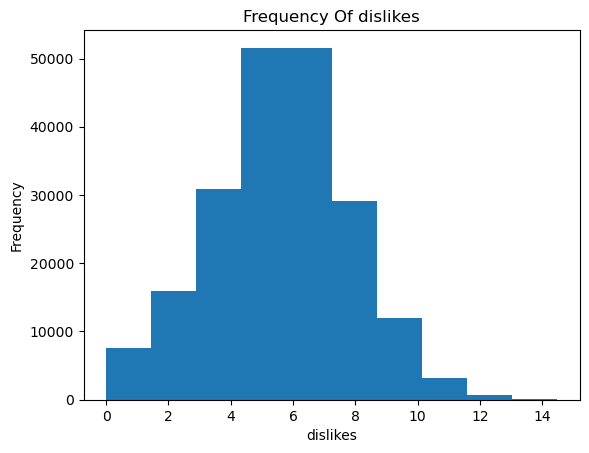

In [55]:
plt.figure()
plt.hist(np.log1p(df_eda['dislikes']))
plt.ylabel('Frequency')
plt.xlabel('dislikes')
plt.title('Frequency Of dislikes')
plt.show()

After applying log transformation to the dislikes column the histogram shows a more normal distribution. However, the frequency of dislikes on the right side of the histogram is slightly higher than they are on the left. This is particularly noticable towards the more extreme number of likes. (0,1,2,3) & (11,12,13,14). There is a higher frequency of dislikes towards the lower number of dislikes. This shows that for each count of the number of dislikes, slightly less videos had extremely high numbers of dislikes.

##### Distribution of Likes:

Likes: The number of people who reacted positively to a specific YouTube video.

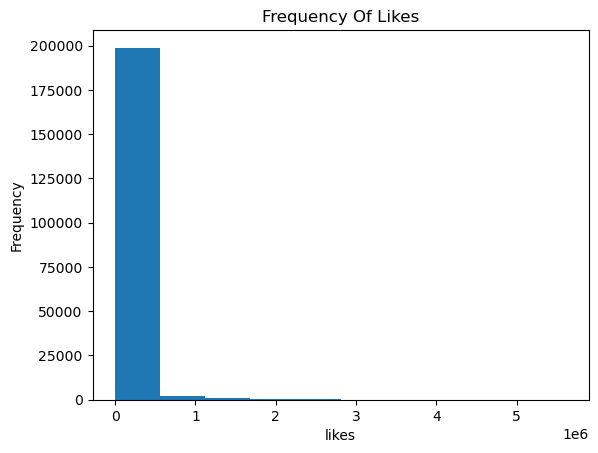

In [56]:
plt.figure()
plt.hist(df_eda['likes'])
plt.ylabel('Frequency')
plt.xlabel('likes')
plt.title('Frequency Of Likes')
plt.show()



The above histogram shows that the distribution of likes is right skewed. There is a higher frequency of values situated at the lower numbers of likes. The frequency of likes decreases as the number of likes increases. 



It is expected that the number of likes spikes towards the lowest values of the histogram because it is assumed that by default trending Youtube videos will have a large number of either likes or dislikes due to their popularity. However, even amongst trending videos there will also be a small percentage of videos that gain more traction than others.


The distribution of likes is highly unbalanced so Log transformation will need to be applied to this column to normalize the data so that it is more symmetric for further analysis.

##### Boxplot: Distribution of YouTube Video Likes:


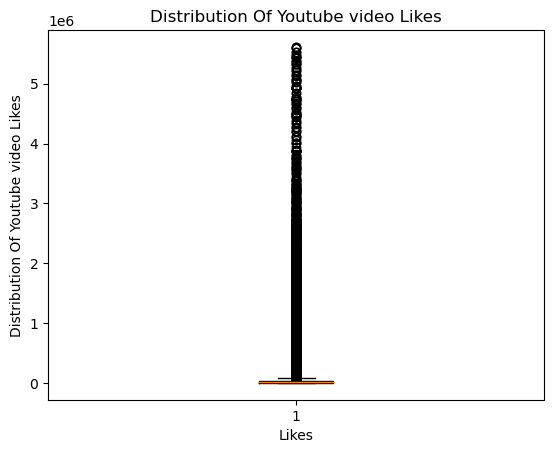

In [57]:
plt.figure()
plt.boxplot(df_eda['likes'])
plt.ylabel('Distribution Of Youtube video Likes')
plt.xlabel('Likes')
plt.title('Distribution Of Youtube video Likes')
plt.show()

Larger values are compressed more than smaller values, bringing the distribution closer to a normal distribution. Log transformation changes the scale of the data and transforms every value to its logarithmic value.

np.log1p will be used instead of np.log. This because this dataset is full of 0s, the normal log function does not work on 0s because the logarithm of 0 is undefined. np.log1 adds a one to the 0s so that the log transformation can be done (a constant value)

##### Log transformation on Likes:

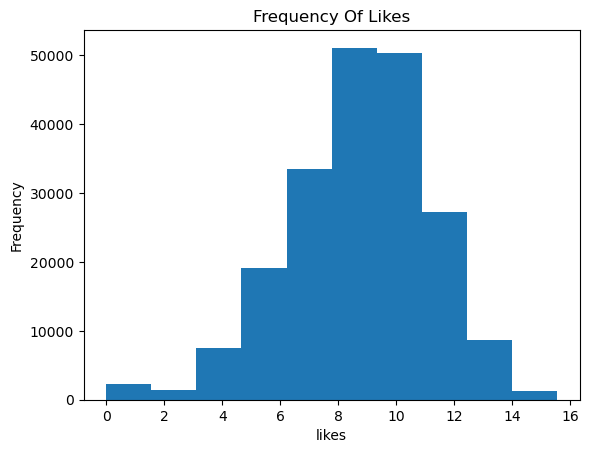

In [58]:
plt.figure()
plt.hist(np.log1p(df_eda['likes'])) # plotting the log transform of the column
plt.ylabel('Frequency')
plt.xlabel('likes')
plt.title('Frequency Of Likes')
plt.show()

After applying log transformation to the views column the data now shows a more normal distribution. However, the data is still slightly skewed to the left.


The frequency of likes is higher towards the middle section of the histogram, with the frequency decreasing towards the more extreme number of likes on both the left and right side. 


There is a slight difference/anomaly in the number of likes towards the lowest values (0-1.5) where a small spike in the number of likes can be seen. 


Despite a slightly normal distribution, the left side of the histogram is not symmetric with the right side. The left side holds a slightly higher frequency of values than the left. This shows that a larger proportion of videos have a high number of likes in the lower ranges. As the number of likes increases, the frequency starts to decrease.

 ##### Bar Chart - Value Counts of Category ID:

 - Category_ID: Corresponding categories that each YouTube video belongs to. There are a total of 18 categories.

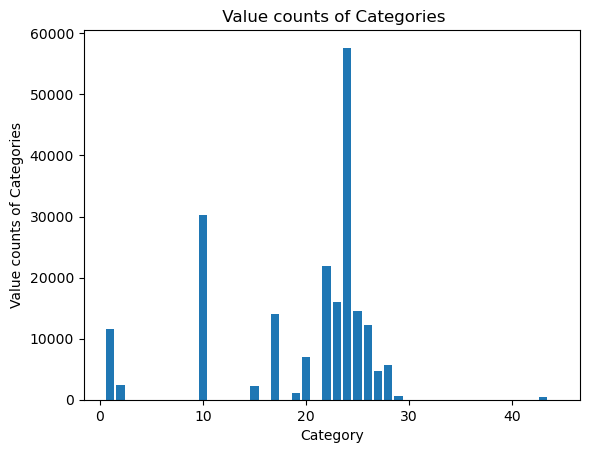

In [59]:
plt.figure()
plt.bar(df_eda['category_id'].value_counts().index, df_eda['category_id'].value_counts().values)# category id value counts
 
plt.xlabel("Category")
plt.ylabel("Value counts of Categories")
plt.title(" Value counts of Categories")
#plt.xticks(rotation=45)
plt.show() # showing the bar chart

From this bar graph it is evident that the categories do not follow a  sequential order, the are non ordinal. Furthermore, 
24, 10 ,22 have the highest value counts, this is difficult to interpret numbers need to be given a corresponding name to make sense of the data and see patterns.

Categorical variables related to the target audience is important  for understanding user preferences so that YouTube video content can be optimized effectively. By analyzing categories, we can identify preferences that contribute to 'views'

These values will need to be one hot encoded because they will be treated as categorical data as opposed to numerical data.

In [60]:
df_eda['category_id'].value_counts() #counting the individual category values.

24    57650
10    30275
22    21948
23    15935
25    14558
17    13962
26    12187
1     11515
20     6973
28     5682
27     4717
2      2427
15     2311
19     1150
29      591
43      407
30       19
44        3
Name: category_id, dtype: int64

The most frequent value is 24 with  57650. Category 24 contributes the most to videos within this dataset.

In [61]:
df_eda['category_id'].nunique() #counting the individual category values.

18

A mentioned beforehand, there are a total of 18 categories.  

In [62]:
df_eda['channel_title'].nunique() #number of unique channel titles

16659

There are less channel titles than there are number of unique video ids which reveals that some channels feature more than once in the trending videos dataset.

In [63]:
df_eda['video_id'].nunique() #confirming the video IDs are unique across the dataframe

79408

## Distribution of Target variable: Views
----

Views: The number of people who have watched a specific Youtube video.

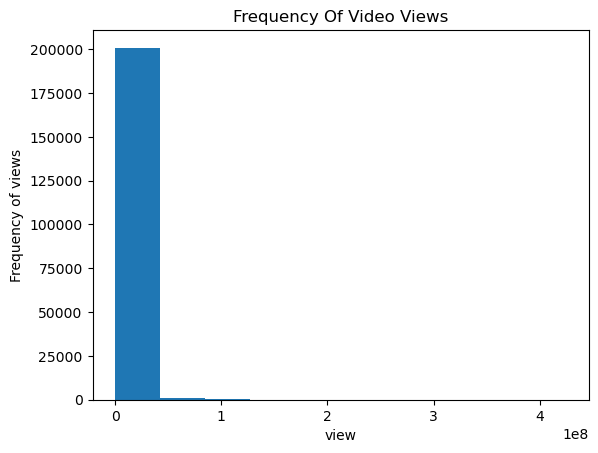

In [64]:
plt.figure()
plt.hist(df_eda['views'])
plt.ylabel('Frequency of views')
plt.xlabel('view')
plt.title('Frequency Of Video Views')
plt.show()

The frequency of views presents a right skewed distribution. The values are higher towards the lower values in the histogram. Towards the higher values in the histogram the number of views decreases. 

The above histogram shows that the the frequency of views decreases as the number of views increases. There is a higher distribution of views towards the lower number in the histogram. From this I can see that there are some anomalies in the data towards the more extreme values. 
Overall, the histogram presents a right skewed distribution - positively skewed (fewer datapoints with larger values) 

- Log transformation will need to be applied to this column to normalize the data so that it is more symmetric.
 
 From looking at this histgram I would expect the central tendancy to be located towards the lower end of the distribution if it were to be plot with a boxplot (the median and the mode) However, I would expect the mean to be situated towards the higher values due to the extreme high values. 

##### Boxplot: Distribution of YouTube Video Views


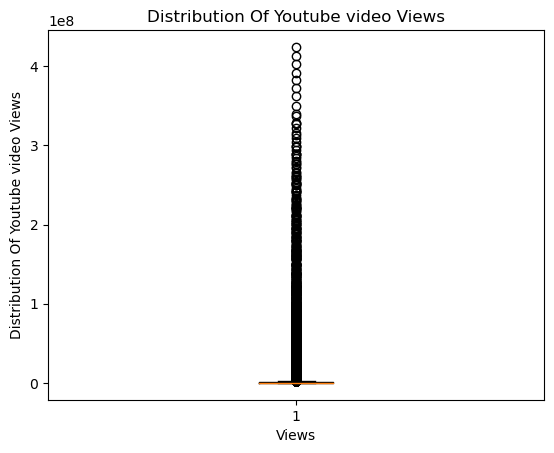

In [65]:
plt.figure()
plt.boxplot(df_eda['views'])
plt.ylabel('Distribution Of Youtube video Views')
plt.xlabel('Views')
plt.title('Distribution Of Youtube video Views')
plt.show()

The above boxplot for the distribution of views shows that the dataset is filled with outlier values. These are values that are considered extreme, or that deviate from the majority of the data. For this boxplot, the outliers are identified by the number of circles that are present outside of the boxplot whiskers. In this case, the visualisation shows no actual box which should show the median, interquartile range, whiskers ect. The median marker, and whisker marker are situated at the number 0. Due to the nature of the dataset (Trending YouTube videos) there are only entries about YouTube videos that are considered anomolies because their number of views deviates from the norm. There is no median, or interquartile range value because the data doesn't follow a set pattern. 

 The positioning of the anomalies above the median and whisker marker shows that these values are high extreme values, which is to be expected. Furthermore, there are some datapoints which fall outside of the range of anaomalies that are closer together (number of datapoints becomes more sparse as the number of views increases)(datapoints are clustered towards the lower range of values). This shows that there are some extreme values amongst the data.

##### Log transformation on the target variable: Views:

- Larger values are compressed more than smaller values, bringing the distribution closer to a normal distribution. Log transformation changes the scale of the data and transforms every value to its logarithmic value.
- np.log1p will be used instead of np.log. This because this dataset is full of 0s, the normal log function does not work on 0s because the logarithm of 0 is undefined. np.log1 adds a one to the 0s so that the log transformation can be done (a constant value)

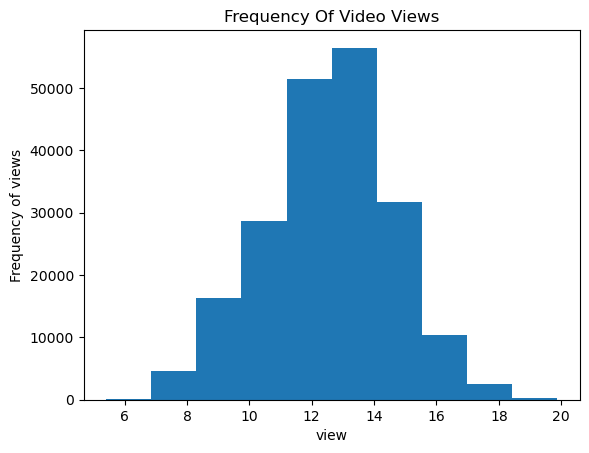

In [66]:
plt.figure()
plt.hist(np.log1p(df_eda['views']))
plt.ylabel('Frequency of views')
plt.xlabel('view')
plt.title('Frequency Of Video Views')
plt.show()

Applying log transformation to the views column has compressed the data so that the extreme values are more symmetric with the rest of the data (Fixing the right skew). After applying log transformation, the histogram now shows a normal distribution. There is a higher frequency of values towards the middle of the data (12-14). The frequency of views then decreases towards the lowest and highest numbers of views (ie: 6,8,18,20)


## Bi-variate Visualisations:
------

##### Relationship between likes and views: 

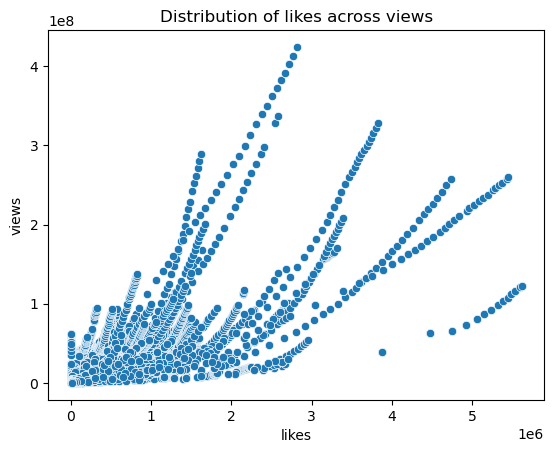

In [67]:
sns.scatterplot(x=df_eda['likes'], y=df_eda['views'])
plt.ylabel('views')
plt.xlabel('likes')
plt.title('Distribution of likes across views')
# Show the plot
plt.show()

The above scatter graph shows an unusual relationship between likes and views. As a whole a there is a higher number of likes towards the lower number of views. This is not unusual as the data-set has entries for trending datasets, so by default most of the datapoint will be grouped near each other. Furthermore, the scatter graph also shows outliers in the data where certain datapoints have an increased number of views with less likes ect (the reverse is also true). As well as this, there are datapoints that are repeated across the scatter graph (datapoints are repeated and trail off). This could be due to the fact that certain videos are recorded to remain trending for prolonged periods of time, leading to an increased number of views over time.

##### Relationship betwen likes and dislikes:

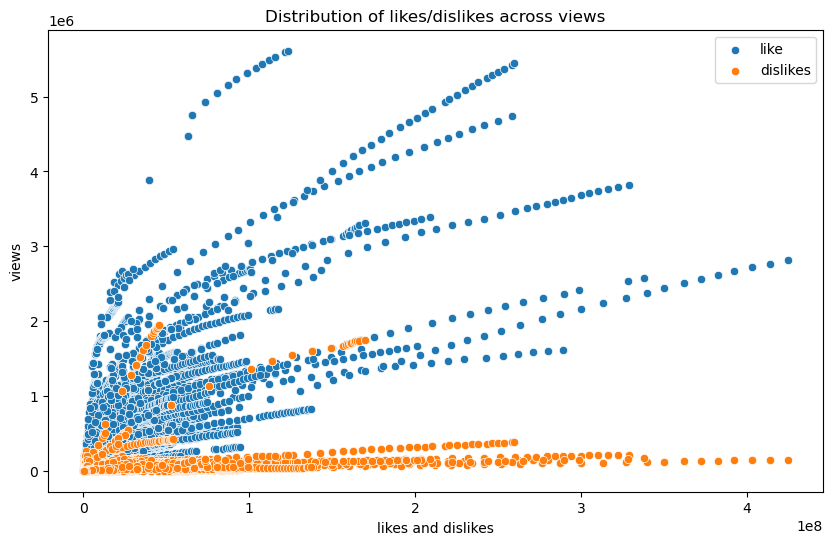

In [68]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_eda, x='views', y='likes', label='like')
sns.scatterplot(data=df_eda, x='views', y='dislikes', label='dislikes')
plt.ylabel('views')
plt.xlabel('likes and dislikes')
plt.title('Distribution of likes/dislikes across views')
plt.legend()

The above graph shows that the dislike column is distributed differently to the views column. There is a higher number of dislikes towards the lower number of views. As the  number of dislikes increases, the number of views is mostly unaffected. There appears to be outliers in the data where the number of views increases as the number of dislikes also increases. Furthermore, there are datapoints that are repeated across the scatter graph (datapoints are repeated and trail off). This could be due to the fact that certain videos are recorded to remain trending for prolonged periods of time, leading to an increased number of dislikes over time.

##### Number of views for each category:

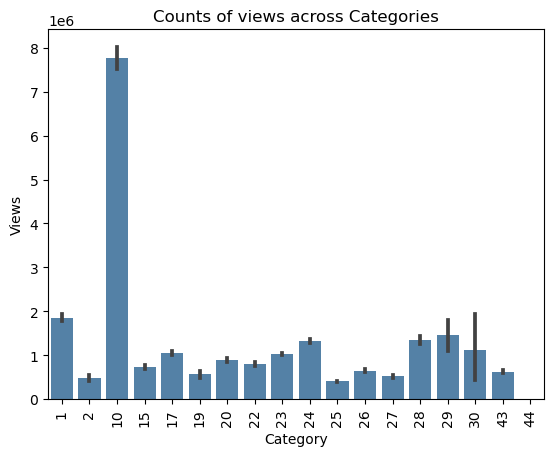

In [69]:
sns.barplot(x=df_eda['category_id'], y=df_eda['views'],color='steelblue')
plt.xlabel("Category")
plt.ylabel("Views")
plt.title("Counts of views across Categories")
plt.xticks(rotation=90)
plt.show()

The above bargraph shows that category: 10, 1 and 29 have the highest number of views.

Feature Correlations:
------
Plotting feature correlations is an important step in understanding the relationship between variables. This can help us to understand if there are any significant connections in the data. 


-----------

##### Correlation Heatmap:

/var/folders/1_/mgb_spqs3b71d7zj3xh9r_6m0000gn/T/ipykernel_1187/1449132590.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_eda.corr()


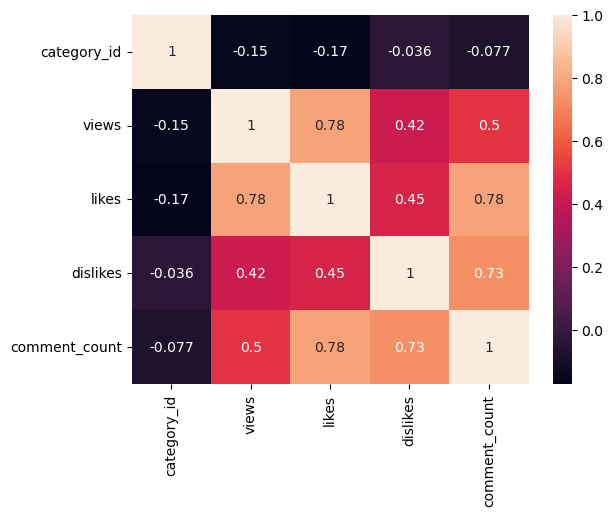

In [70]:
corr_matrix = df_eda.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

##### Feature Correlation table:

In [71]:
df_eda.corr(method ='pearson')

/var/folders/1_/mgb_spqs3b71d7zj3xh9r_6m0000gn/T/ipykernel_1187/848431104.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_eda.corr(method ='pearson')


,category_id,views,likes,dislikes,comment_count
category_id,1.000000,-0.153767,-0.172141,-0.035868,-0.076689
views,-0.153767,1.000000,0.784467,0.415790,0.501928
likes,-0.172141,0.784467,1.000000,0.454301,0.780923
dislikes,-0.035868,0.415790,0.454301,1.000000,0.727815
comment_count,-0.076689,0.501928,0.780923,0.727815,1.000000


Now that the dataset has been cleaned, plotting the correlations between the selected feature variables will help with understanding the strength between variables. It is important to note that value of -1 or + indicate a strong relationship between variable, and a value close to 0 indicates a poor relationship. *If a variable is plotted against itself it will always produce a strong positive correlation, therefore we will ignore these values.


##### Feature Correlations with the target variable:

In [72]:
df_eda.corr()["views"].sort_values(ascending=False) # examine variable relationships with the target variable. 

/var/folders/1_/mgb_spqs3b71d7zj3xh9r_6m0000gn/T/ipykernel_1187/3480441240.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_eda.corr()["views"].sort_values(ascending=False) # examine variable relationships with the target variable.


views            1.000000
likes            0.784467
comment_count    0.501928
dislikes         0.415790
category_id     -0.153767
Name: views, dtype: float64

The correlation table shows that the likes column is strongly correlated to the views column. Furthermore, the category id column is stronly and negatively correlated to the views column. Despite the table stating that the category column is strongly correlated to views, it is not reliable because correlation is only used to measure continuous variables (the category id is not ordinal or continuous, it is categorical). As the number of likes increases, so will the number of views.

##### Summarising Findings:
-------
- There is a higher number of dislikes towards the lower number of views. As the  number of dislikes increases, the number of views is mostly unaffected. 
- certain videos are recorded to remain trending for prolonged periods of time, leading to an increased number of dislikes over time.
- The boxplot for the distribution of views shows that the dataset is filled with outlier values. These are values that are considered extreme, or that deviate from the majority of the data.

In [73]:
joblib.dump(df_eda,'df_processing.pkl')

['df_processing.pkl']